In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=4e498e01ce5ab3b2755230ffceddcb551f33062d225f40bca6cab9ec0dc32103
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy

from skfuzzy import control


## Generating variables(Crisp)

In [ ]:
project_funding = np.arange(0, 101, 0.10)
project_staffing = np.arange(0, 101, 0.10)
project_risk = np.arange(0, 101, 0.10)

## Generating fuzzy membership-functions

In [ ]:
#for project funding
inadequate_project_funding = skfuzzy.trapmf(project_funding, [ 0,0, 20, 30])
marginal_project_funding = skfuzzy.trimf(project_funding, [ 20, 50, 80])
adequate_project_funding = skfuzzy.trapmf(project_funding, [ 60, 80, 100,100])

#for project staffing
small_project_staffing = skfuzzy.trapmf(project_staffing, [ 0, 0, 30, 60])
large_project_staffing= skfuzzy.trapmf(project_staffing, [ 40, 60, 100, 100])

#for project risk
low_project_risk = skfuzzy.trapmf(project_risk, [ 0,0,20, 40])
normal_project_risk = skfuzzy.trimf(project_risk, [ 20, 50, 80])
high_project_risk = skfuzzy.trapmf(project_risk, [ 60, 80, 100,100 ])

## Visualization of universes and membership functions

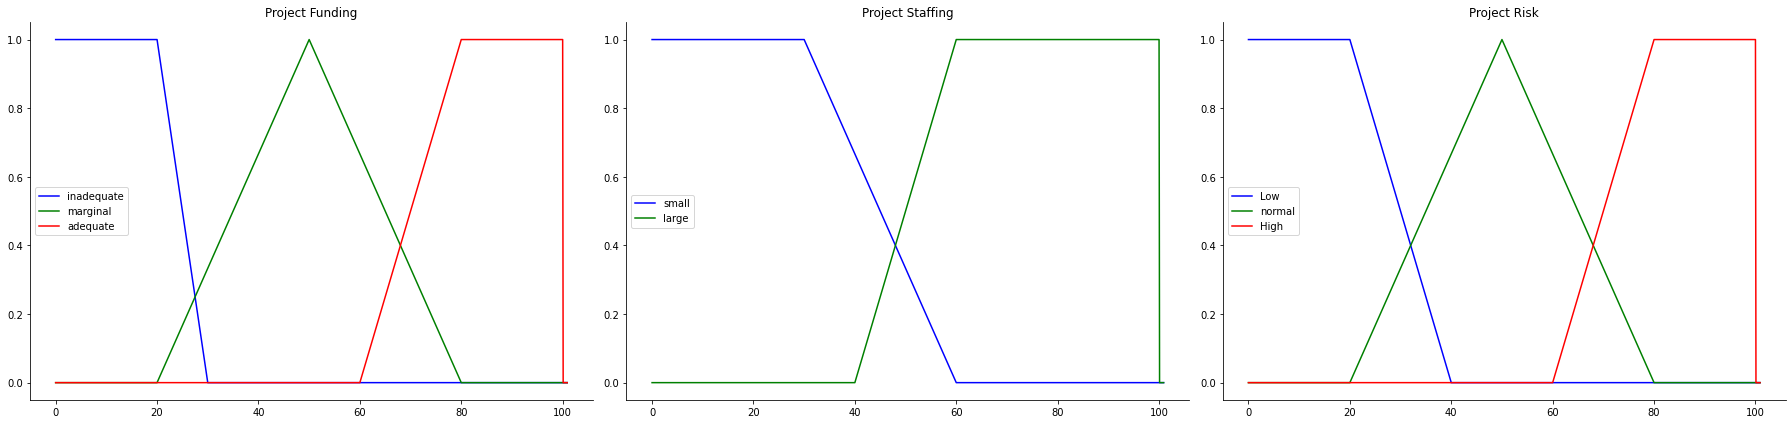

In [ ]:
fig, axis = plt.subplots(1,3, figsize=(25, 6))

axis[0].plot(project_funding, inadequate_project_funding, 'b', linewidth=1.5, label='inadequate')
axis[0].plot(project_funding, marginal_project_funding, 'g', linewidth=1.5, label='marginal')
axis[0].plot(project_funding, adequate_project_funding, 'r', linewidth=1.5, label='adequate')
axis[0].set_title('Project Funding')
axis[0].legend()

axis[1].plot(project_staffing, small_project_staffing, 'b', linewidth=1.5, label='small')
axis[1].plot(project_staffing, large_project_staffing, 'g', linewidth=1.5, label='large')
axis[1].set_title('Project Staffing')
axis[1].legend()

axis[2].plot(project_risk, low_project_risk, 'b', linewidth=1.5, label='Low')
axis[2].plot(project_risk, normal_project_risk, 'g', linewidth=1.5, label='normal')
axis[2].plot(project_risk, high_project_risk, 'r', linewidth=1.5, label='High')
axis[2].set_title('Project Risk')
axis[2].legend()

# Turn off top/right axes
for ax in (axis):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()

plt.tight_layout()

## Getting The Degree of membership-function for given input

In [ ]:
output_inadequate_project_funding = skfuzzy.interp_membership(project_funding, inadequate_project_funding, 25)
output_marginal_project_funding = skfuzzy.interp_membership(project_funding, marginal_project_funding, 25)
output_adequate_project_funding = skfuzzy.interp_membership(project_funding, adequate_project_funding, 25)
output_small_project_staffing = skfuzzy.interp_membership(project_staffing, small_project_staffing, 55)
output_large_project_staffing = skfuzzy.interp_membership(project_staffing, large_project_staffing, 55)

In [ ]:
print(f"Inadequate Project Funding: {output_inadequate_project_funding :0.2f}")
print(f"Marginal Project Funding: {output_marginal_project_funding :0.2f}")
print(f"Adequate Project Funding: {output_adequate_project_funding :0.2f}")

print(f"Small Project Staffing: {output_small_project_staffing :0.2f}")
print(f"Large Project Staffing: {output_large_project_staffing :0.2f}")

Inadequate Project Funding: 0.50
Marginal Project Funding: 0.17
Adequate Project Funding: 0.00
Small Project Staffing: 0.17
Large Project Staffing: 0.75


## Defining the set of rules

In [ ]:
#project_funding[ 'adequate' ] | project_staffing[ 'small' ], project_risk[ 'low' ]
risk_activation_lo = np.fmin(low_project_risk,np.fmax(output_adequate_project_funding,output_small_project_staffing))

#project_staffing[ 'large' ] & project_funding[ 'marginal' ], project_risk[ 'normal' ]
risk_activation_nor = np.fmin(normal_project_risk,np.fmin(output_marginal_project_funding,output_large_project_staffing))

#project_funding[ 'inadequate' ], project_risk[ 'high' ]

risk_activation_high = np.fmin(output_inadequate_project_funding,high_project_risk)

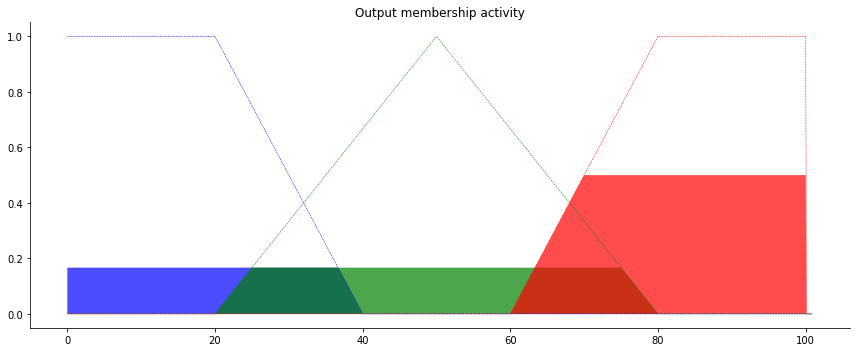

In [ ]:
tip0 = np.zeros_like(project_risk)

# Visualize this
fig, axis = plt.subplots(figsize=(12, 5))
axis.fill_between(project_risk, tip0, risk_activation_lo, facecolor='b', alpha=0.7)
axis.plot(project_risk, low_project_risk, 'b', linewidth=0.5, linestyle='--', )
axis.fill_between(project_risk, tip0, risk_activation_nor, facecolor='g', alpha=0.7)
axis.plot(project_risk, normal_project_risk, 'g', linewidth=0.5, linestyle='--')
axis.fill_between(project_risk, tip0, risk_activation_high, facecolor='r', alpha=0.7)
axis.plot(project_risk, high_project_risk, 'r', linewidth=0.5, linestyle='--')
axis.set_title('Output membership activity')

# Turn off top/right axes
for ax in (axis,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
  
plt.tight_layout()

## Aggregating all three output membership-functions together

In [ ]:
aggregated = np.fmax(risk_activation_lo,np.fmax(risk_activation_nor, risk_activation_high))

## Calculating defuzzified result and visualizing them

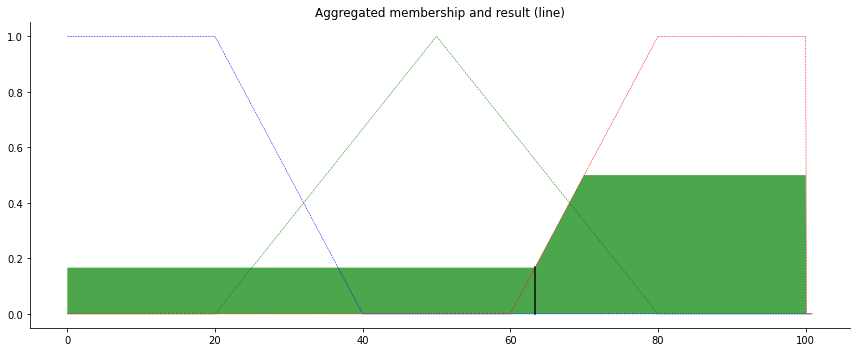

In [ ]:
tip = skfuzzy.defuzz(project_risk, aggregated, 'centroid')
tip_activation = skfuzzy.interp_membership(project_risk, aggregated, tip) 

fig, axis = plt.subplots(figsize=(12, 5))
axis.plot(project_risk, low_project_risk, 'b', linewidth=0.5, linestyle='--', )
axis.plot(project_risk, normal_project_risk, 'g', linewidth=0.5, linestyle='--')
axis.plot(project_risk, high_project_risk, 'r', linewidth=0.5, linestyle='--')
axis.fill_between(project_risk, tip0, aggregated, facecolor='Green', alpha=0.7)
axis.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
axis.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (axis,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
 
plt.tight_layout()

In [ ]:
print(f"Tip: {tip :0.2f}")

Tip: 50.00
